In [67]:
import glob
from scipy.ndimage import imread
from scipy.misc import imresize
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [70]:
one_hot_encoded(2,10)

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [68]:
def one_hot_encoded(class_numbers, num_classes):
    return np.eye(num_classes, dtype=float)[class_numbers]


def normalize(img, cdim=3):
#     [0-255]/255 * 2-1 ---->[-1,1]
    return img/255.0*2-1

def unnormalize(img, cdim=3):
    # [-1,1]+1-->[0,2]/2--->[0,1]*255---->[0,255]
    for i in range(cdim):
        img[:, :, i] = 255. * ((img[:, :, i] + 1.) / 2.0)
    img_out = img.astype(np.uint8)
    return img_out

def plotImages(imgs,labels,names,size=(128,128,3)):
    fig, axarr = plt.subplots(4, 4,figsize=(20,20))
    for i in range(4):
        for j in range(4):
            img = imgs[i*4+j].reshape(size)
            label = labels[i*4+j]
            axarr[i, j].imshow(img)
            axarr[i, j].set_title(names[label])
            axarr[i, j].axis('off')
            axarr[i, j].set_xticklabels([])
            axarr[i, j].set_yticklabels([])
            axarr[i, j].set_aspect('equal')

In [3]:
files = glob.glob('D:/places365_standard/train/swimming_pool-indoor/*jpg')
files.extend(glob.glob('D:/places365_standard/train/swimming_pool-outdoor/*jpg'))

In [4]:
im = Image.open(files[0])
# 查看图片的格式 大小 和 模式(L,RGB, CMKY)
im.format,im.size,im.mode

('JPEG', (256, 256), 'RGB')

In [5]:
names = ['indoor','outdoor']
imgs = []
labels = []
for file in files:
    img = Image.open(file);
    img = img.resize((128, 128),Image.ANTIALIAS)
#     img = normalize(np.array(img))
    img = np.array(img)
    img = img.flatten()
    imgs.append(img)
    if names[0] in file:
        labels.append(0)
    if names[1] in file:
        labels.append(1)
n = len(files)
imgs = np.array(imgs)[:n,:]
labels = np.array(labels).reshape(-1,1)[:n,:]
data = np.concatenate((imgs,labels),axis=1)


In [9]:
np.savez('data.npz',data=data,names=names)

In [5]:
class swimming_pool(object):
    """
    (1) The data is transoformed to [-1,1]
    (2) next_batch and test_batch
    """

    def __init__(self, data, names):
        self.data = data
        np.random.shuffle(self.data)
        self.dataset_size = len(data)
        self.class_names = names

        self.iteration = 0
        self.train_imgs, self.test_imgs, self.train_labels, self.test_labels = \
            train_test_split(self.data[:, :-1], self.data[:, -1], test_size=0.2, random_state=42)
        self.train_num = self.train_imgs.shape[0]
        print('train imgs:', self.train_imgs.shape)
        print('test imgs:', self.test_imgs.shape)
        self.x_dim = [128, 128, 3]

    def next_batch(self, batch_size):
        if (self.iteration * batch_size) % self.train_num == 0:
            print('another whole batch')
            self.rand_idx = np.random.choice(range(self.train_num), size=(self.train_num,), replace=False)
        self.epoch = self.train_num//batch_size
        left,right = self.iteration%self.epoch, (self.iteration+1)%self.epoch
        rang = self.rand_idx[left*batch_size:right*batch_size]
        self.iteration += 1
        #       print(self.train_imgs[rang].shape, self.train_labels[rang].shape)
        return self.train_imgs[rang].reshape(-1,128,128,3), self.train_labels[rang]

    def test_batch(self):
        self.rand_id = np.random.choice(range(self.test_imgs.shape[0]), size=(self.test_imgs.shape[0],), replace=False)
        return self.test_imgs[self.rand_id].reshape(-1,128,128,3), self.test_labels[self.rand_id]

In [6]:
p = np.load('data.npz')
data,names = p['data'],p['names']

In [40]:
d = swimming_pool(data,names)

train imgs: (8000, 49152)
test imgs: (2000, 49152)


In [52]:
x,y = d.next_batch(2000)
d.iteration

7

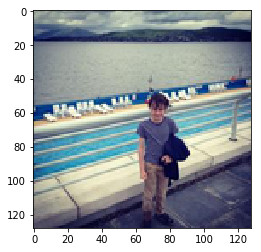

In [66]:
plt.imshow(unnormalize(normalize(x[8].reshape(128,128,3))))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


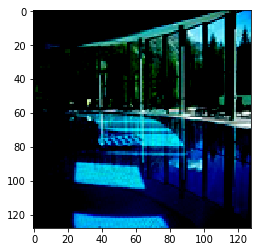

In [62]:
xt =x[1].reshape(128,128,3)
xt = xt/255.0*2-1
plt.imshow(xt)

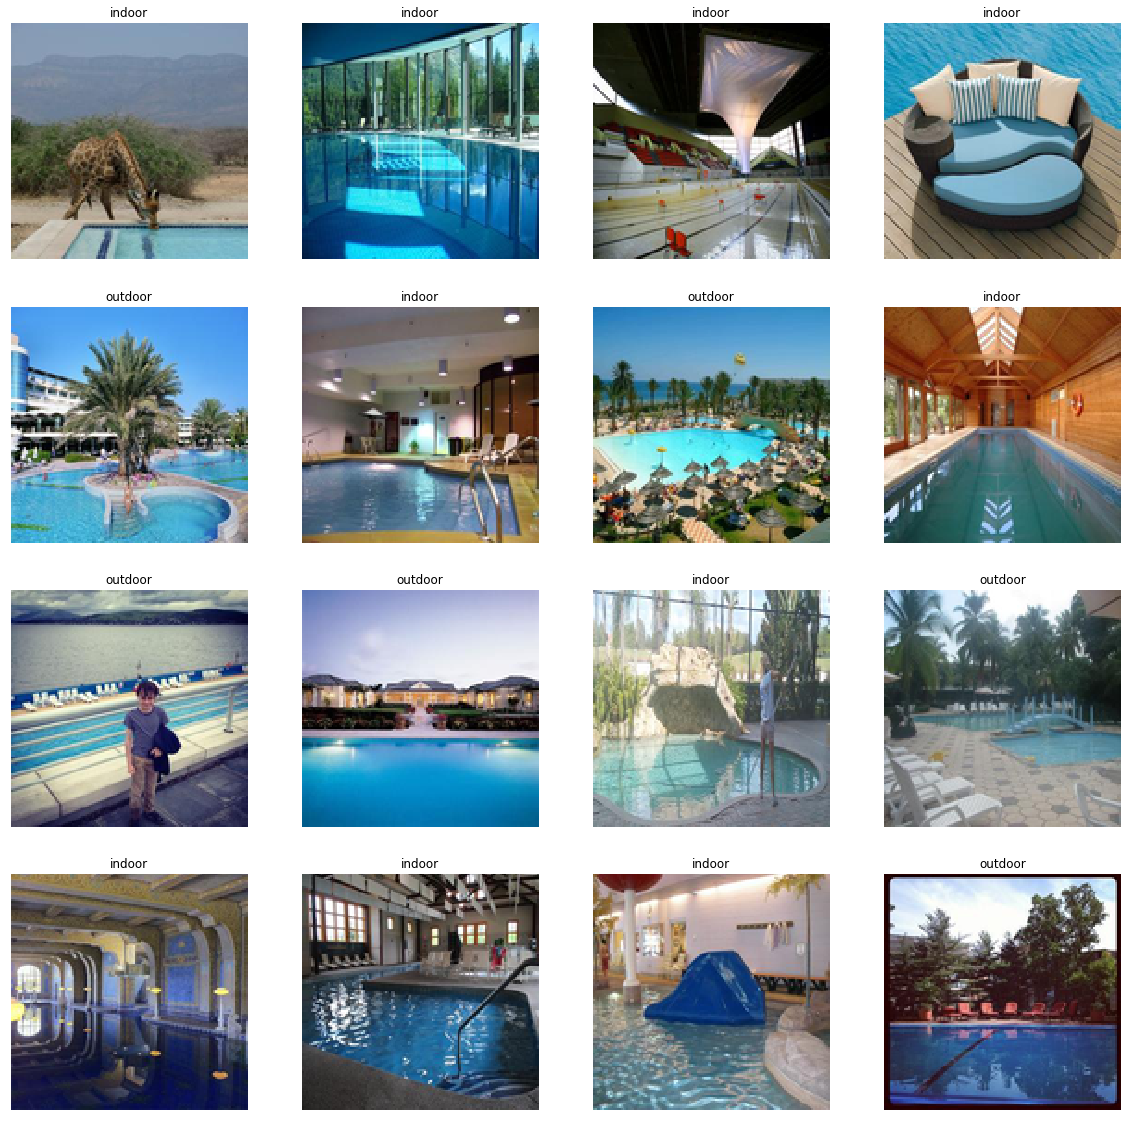

In [55]:
plotImages(x,y,names)

In [59]:
p = np.load('data.npz')
data, names = p['data'], p['names']
data = data[data[:,-1]==0,:]
dataset = swimming_pool(data,names)

train imgs: (4000, 49152)
test imgs: (1000, 49152)


In [61]:
data.shape

(5000, 49153)

In [60]:
dataset.train_imgs

array([[ 63, 117, 152, ...,  55,  60,  71],
       [237, 252, 255, ...,   5,  29,  33],
       [ 87, 118, 121, ...,  60,  75,  72],
       ...,
       [213, 219, 241, ...,  73, 157, 183],
       [ 67,  73,  69, ...,  31,  42,  53],
       [102, 101,  97, ...,  65,  60,  58]])